### The point of this question was mainly to get us, the students, to learn how to read in the data and work with it.

.

"Read in the 2 data sets (minute and hour resolution) for the Station 'UVic Science Building'
(48.462N, 236.691E). Give brief discussions for each result.

1. For the full length data sets (01/01/2010 to 30/08/2017):

 Plot the time series (use 'subplot' to have hourly and minute data on same page).

 Compare sample mean and sample standard deviations.

 Generate approximate pdf's (i.e. from histograms)

 Compare approximate pdf's with an appropriate normal distribution.

.

2. Now look at annual data. Calculate from hourly data the sample means x and sample standard deviations s$_{x}$ for each year.

 Generate approximate pdf's of x and s$_{x}$ (i.e. from histograms)

 Briefly discuss the results."

In [1]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from datetime import datetime, timedelta

In [5]:
import scipy as sc

In [6]:
%matplotlib nbagg

In [7]:
uvic_sci_min = np.loadtxt("Data/AllStations_temperature_minute_data_2019/UVicSci_temperature_2019.dat")

In [8]:
#uvic_sci_min[2] #length of the minute data

In [9]:
tt_start = uvic_sci_min[0]
tt_end = uvic_sci_min[1]
NT = uvic_sci_min[2]

In [10]:
tt = np.linspace(tt_start, tt_end, int(NT))

In [11]:
all_hour = np.loadtxt("Data/AllStations_temperature_hour_data_2019.dat")

In [12]:
#len(all_hour) #No. of rows of hour data

In [13]:
#len(all_hour[0])

In [14]:
#all_hour[0] #All Longitudes

In [15]:
uvic_sci_hour_temp = np.zeros(len(all_hour) - 2)
uvic_sci_hour_time = np.zeros(len(all_hour) - 2)
for i in range(2, len(all_hour)):
    uvic_sci_hour_time[i-2] = all_hour[i][0]    
    uvic_sci_hour_temp[i-2] = all_hour[i][-3]

In MATLAB, datenum(2017,1,1) will return 736696.0 (in decimal days, starting at 01/01/00).

We're trying to replicate that here:

In [16]:
#year, month, day - "year" starts at 2001 (called 1... not 2001); 0 (i.e. year 2000) returns error.
epoch = datetime(1, 1, 1)
result = epoch + timedelta(days=736696.0)
print(result)

2018-01-03 00:00:00


In [17]:
epoch = datetime(datetime.now().year - 2019, 1, 1)
result = epoch + timedelta(days=736696.0)
print(result)

ValueError: year 0 is out of range

In [18]:
epoch = datetime(1, 1, 1)
result = epoch + timedelta(days=736696.0 - 367.0)
print(result)

2017-01-01 00:00:00


Therefore, we use the offset I found above:

In [16]:
epoch = datetime(1, 1, 1)
tt_pretty = [epoch + timedelta(days=x-367.0) for x in tt]
uvic_sci_hour_time_pretty = [epoch + timedelta(days=y-367.0) for y in uvic_sci_hour_time]

<IPython.core.display.Javascript object>


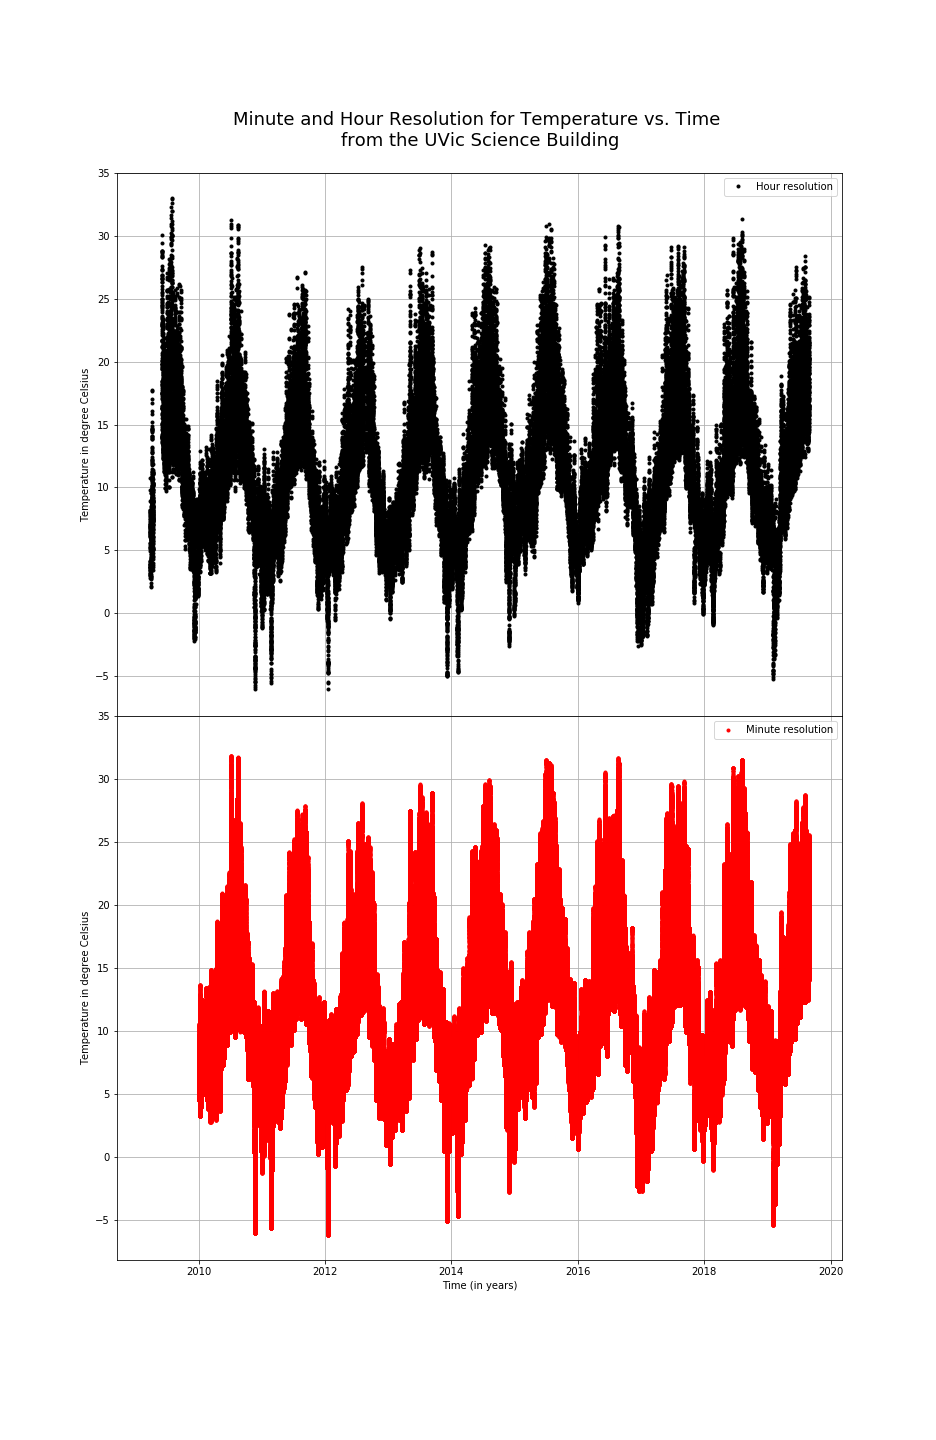

In [20]:
fig1, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(13, 20))
plt.subplots_adjust(hspace=0)
ax[0].plot(uvic_sci_hour_time_pretty, uvic_sci_hour_temp, 'k.', label='Hour resolution')
ax[1].plot(tt_pretty, uvic_sci_min[3:], 'r.', label='Minute resolution')
ax[0].grid()
ax[1].grid()
ax[0].set_title("Minute and Hour Resolution for Temperature vs. Time \nfrom the UVic Science Building\n", fontsize=18)
ax[1].set_xlabel("Time (in years)")
ax[0].set_ylabel("Temperature in degree Celsius")
ax[1].set_ylabel("Temperature in degree Celsius")
ax[0].legend()
ax[1].legend()

In [21]:
plt.savefig("Minute_vs_hour_UVic_Sci.jpg")
plt.close()

### I attempted to write my own code for finding mean and standard deviation and such.

In [ ]:
def pickout(x_array):
    '''
    When you attempt to sum over an array that doesn't have 
    only numbers, it doesn't work
    '''
    x_array = np.array(x_array)
    x_list = list(x_array)
    
    #returns array of booleans stating whether element is nan or not
    oopsie = np.isnan(x_array)
    
    #as you pop numbers out of your list, your list gets shorter... so its your specified index - offset
    offset = 0
    for i in range(len(oopsie)):
        if oopsie[i]:
            a = x_list.pop(i-offset)
            offset += 1
    
    return np.array(x_list)
    
def mean(x_array, picky=False):
    '''
    Takes in an array of numbers for a given random variable
    And returns the mean
    Does the same thing as np.nanmean()
    '''
    if picky:
        x_array = pickout(x_array)
    return sum(x_array)/len(x_array)

def sample_variance(x_array, picky=False):
    '''
    Takes in an array of numbers for a given random variable
    And returns sample variance i.e. assumes that
    we do not have an entire population worth of data
    '''
    if picky:
        x_a = pickout(x_array)
    else:
        x_a = np.array(x_array)
    return sum((x_a - mean(x_a))**2)/(len(x_a) - 1)

def sample_std_dev(x_array, picky=False):
    '''
    Takes in an array of numbers for a given random variable
    And returns sample standard deviation i.e. assumes that
    we do not have an entire population worth of data
    Does the same thing as np.nanstd()
    '''
    return np.sqrt(sample_variance(x_array, picky))

In [17]:
uvic_sci_min_cut = pickout(uvic_sci_min) #this takes WAY WAY too long

In [18]:
uvic_sci_hour_temp_cut = pickout(uvic_sci_hour_temp)

In [19]:
print("Sample mean of Minute resolution data: ", mean(uvic_sci_min_cut))
print("Sample standard deviation of Minute resolution data: ", sample_std_dev(uvic_sci_min_cut))
print()
print("Sample mean of Hour resolution data: ", mean(uvic_sci_hour_temp_cut))
print("Sample standard deviation of Hour resolution data: ", sample_std_dev(uvic_sci_hour_temp_cut))
print()

Sample mean of Minute resolution data:  12.459090816317355
Sample standard deviation of Minute resolution data:  2312.2928511391387

Sample mean of Hour resolution data:  11.23479633560497
Sample standard deviation of Hour resolution data:  5.562707773160307



In [20]:
print("Sample mean of Minute resolution data: ", np.mean(uvic_sci_min))
print("Sample standard deviation of Minute resolution data: ", np.std(uvic_sci_min))
print()
print("Sample mean of Hour resolution data: ", np.mean(uvic_sci_hour_temp))
print("Sample standard deviation of Hour resolution data: ", np.std(uvic_sci_hour_temp))
print()

Sample mean of Minute resolution data:  nan
Sample standard deviation of Minute resolution data:  nan

Sample mean of Hour resolution data:  nan
Sample standard deviation of Hour resolution data:  nan



In [21]:
print("Sample mean of Minute resolution data: ", np.nanmean(uvic_sci_min))
print("Sample standard deviation of Minute resolution data: ", np.nanstd(uvic_sci_min))
print()
print("Sample mean of Hour resolution data: ", np.nanmean(uvic_sci_hour_temp))
print("Sample standard deviation of Hour resolution data: ", np.nanstd(uvic_sci_hour_temp))
print()

Sample mean of Minute resolution data:  12.459090816334394
Sample standard deviation of Minute resolution data:  2312.2926215472785

Sample mean of Hour resolution data:  11.23479633560496
Sample standard deviation of Hour resolution data:  5.562676699965669



### Conclusions:

### a) My module works... but it is not as efficient as numpy. Atleast it does what it is supposed to. So just use numpy.nanmean() and numpy.std()

### b) Yes, the standard deviation of the minute resolution data is 2000-something. np.nanstd() is wrong. Use pandas! See below.

<IPython.core.display.Javascript object>


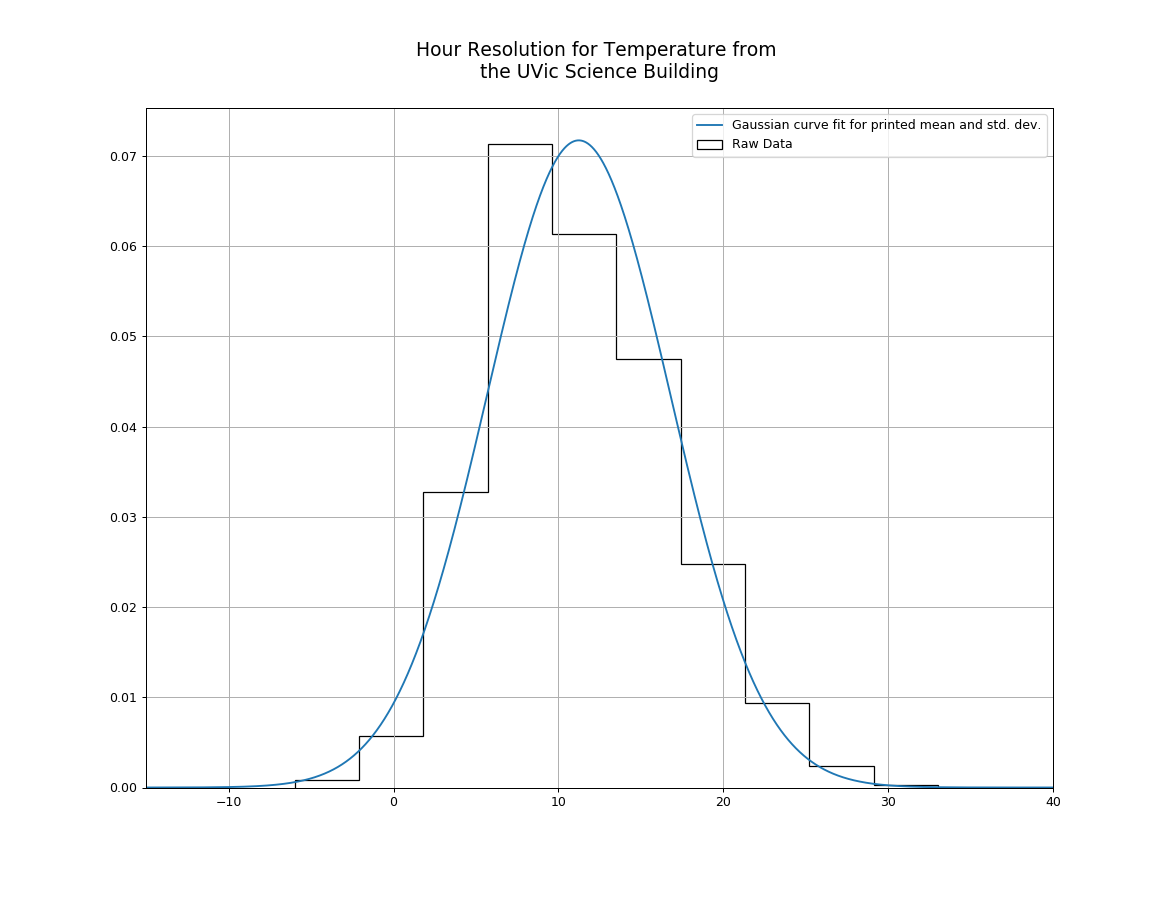

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


In [22]:
fig1 = plt.figure(figsize=(13, 10))
x_var = np.linspace(-15, 40, 10000)
plt.title("Hour Resolution for Temperature from \nthe UVic Science Building\n", fontsize=15)
plt.hist(uvic_sci_hour_temp, histtype='step', color='black', label='Raw Data', normed=True)
plt.plot(x_var, stat.gaussian_curve(x_var, mu=np.nanmean(uvic_sci_hour_temp), sigma=np.nanstd(uvic_sci_hour_temp)), label='Gaussian curve fit for printed mean and std. dev.')
plt.grid(True)
plt.xlim(-15, 40)
plt.legend()

In [23]:
plt.savefig("Hour_UVic_Sci_pdf.jpg")
plt.close()

Normed=True is problematic in plt.hist -> bins behave inversely to what you'd expect. You expect that as no. of bins increases, the frequency of each bin decreases (because there are fewer counts of each individual temperature. And we see that when Normed=False. Opposite case when Normed=True.

### Data is positively skewed, with a lower mean, when compared to scaled Gaussian

In [24]:
import pandas as pd

In [25]:
hour_dict = {'Time':uvic_sci_hour_time_pretty, 'Temperature': uvic_sci_hour_temp}

In [26]:
hour_res_df = pd.DataFrame(hour_dict)

In [27]:
hour_res_df['Temperature'].std()

5.562707773160339

In [28]:
minute_dict = {'Time':tt_pretty, 'Temperature': uvic_sci_min[3:]}

In [29]:
minute_res_df = pd.DataFrame(minute_dict)

In [30]:
minute_res_df['Temperature'].std()

5.531298416772806

Pandas std() gave the right answer. Not np.nanstd() or my code.

In [31]:
print(minute_res_df)

                              Time  Temperature
0       2010-01-01 00:00:00.000000         4.59
1       2010-01-01 00:00:59.999996         4.56
2       2010-01-01 00:02:00.000003         4.56
3       2010-01-01 00:02:59.999999         4.59
4       2010-01-01 00:03:59.999996         4.61
5       2010-01-01 00:05:00.000002         4.61
6       2010-01-01 00:05:59.999999         4.61
7       2010-01-01 00:07:00.000005         4.61
8       2010-01-01 00:08:00.000002         4.61
9       2010-01-01 00:08:59.999998         4.61
10      2010-01-01 00:10:00.000004         4.61
11      2010-01-01 00:11:00.000001         4.61
12      2010-01-01 00:11:59.999997         4.61
13      2010-01-01 00:13:00.000004         4.61
14      2010-01-01 00:14:00.000000         4.61
15      2010-01-01 00:14:59.999997         4.61
16      2010-01-01 00:16:00.000003         4.61
17      2010-01-01 00:17:00.000000         4.61
18      2010-01-01 00:18:00.000006         4.61
19      2010-01-01 00:19:00.000002      

In [32]:
print(hour_res_df)

                             Time  Temperature
0      2008-01-01 00:00:00.000000          NaN
1      2008-01-01 01:00:02.879995          NaN
2      2008-01-01 01:59:57.120005          NaN
3      2008-01-01 03:00:00.000000          NaN
4      2008-01-01 04:00:02.879995          NaN
5      2008-01-01 04:59:57.120005          NaN
6      2008-01-01 06:00:00.000000          NaN
7      2008-01-01 07:00:02.879995          NaN
8      2008-01-01 07:59:57.120005          NaN
9      2008-01-01 09:00:00.000000          NaN
10     2008-01-01 10:00:02.879995          NaN
11     2008-01-01 10:59:57.120005          NaN
12     2008-01-01 12:00:00.000000          NaN
13     2008-01-01 13:00:02.879995          NaN
14     2008-01-01 13:59:57.120005          NaN
15     2008-01-01 15:00:00.000000          NaN
16     2008-01-01 16:00:02.879995          NaN
17     2008-01-01 16:59:57.120005          NaN
18     2008-01-01 18:00:00.000000          NaN
19     2008-01-01 19:00:02.879995          NaN
20     2008-0